In [2]:
# Required for autoreload in notebook
%load_ext autoreload
%autoreload 2

import pandas as pd

from src.database import Database
from src.measurement import Measurement
from src.feature import FeatureExtracting
from src.model import FeatureImportanceEvaluator


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
database_filepath = 'src/Data/02_Data/0001_Database.xlsx'
audio_folder = 'src/Data/02_Data/01_Audio'
weld_folder = 'src/Data/02_Data/02_Weldqas'

# New Datasheet: Cleansed, only with number, label, and features!
output_filepath = 'src/Data/0001_Database_with_features.xlsx'

db = Database(database_filepath, skip_rows=10, use_cols="B:O")

### Step 1: Data Cleansing

In [4]:
# Ensure 'openpyxl' is installed before running the code
feature_extractor = FeatureExtracting(audio_folder, weld_folder, database_filepath)

# Print the column names to verify
print(feature_extractor.database.data.columns)

clean_data = feature_extractor.cleanse_data()

if clean_data is not None:
    feature_extractor.save_to_excel(output_filepath)
    print(clean_data[['Number of Measurement', 'Dataset'] + [
        'audio_mean', 'audio_std', 'audio_min', 'audio_max', 'audio_rms',
        'current_mean', 'current_std', 'current_min', 'current_max', 'current_rms',
        'voltage_mean', 'voltage_std', 'voltage_min', 'voltage_max', 'voltage_rms',
        'wire_mean', 'wire_std', 'wire_min', 'wire_max', 'wire_rms'
    ]].head())
else:
    print("Data cleansing failed due to errors in loading the database.")

Found 201 files in this directory. Data loading starting...
Currently reading 169.csv
Currently reading 170.csv
Currently reading 171.csv
Currently reading 172.csv
Currently reading 173.csv
Currently reading 174.csv
Currently reading 175.csv
Currently reading 176.csv
Currently reading 177.csv
Currently reading 178.csv
Currently reading 179.csv
Currently reading 180.csv
Currently reading 181.csv
Currently reading 182.csv
Currently reading 183.csv
Currently reading 184.csv
Currently reading 185.csv
Currently reading 186.csv
Currently reading 187.csv
Currently reading 188.csv
Currently reading 189.csv
Currently reading 190.csv
Currently reading 191.csv
Currently reading 192.csv
Currently reading 193.csv
Currently reading 194.csv
Currently reading 195.csv
Currently reading 196.csv
Currently reading 197.csv
Currently reading 198.csv
Currently reading 199.csv
Currently reading 200.csv
Currently reading 201.csv
Currently reading 202.csv
Currently reading 203.csv
Currently reading 204.csv
Curr

c:\Users\Oli\Documents\Uni\AiInPE_GroupB\src\feature.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.011418344501503006' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.database.data.at[index, feature] = value
c:\Users\Oli\Documents\Uni\AiInPE_GroupB\src\feature.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1485.917267120138' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.database.data.at[index, feature] = value
c:\Users\Oli\Documents\Uni\AiInPE_GroupB\src\feature.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1485.9172671640092' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.data

Data saved to src/Data/0001_Database_with_features.xlsx
   Number of Measurement Dataset  audio_mean    audio_std  audio_min  \
0                    169      iO   -0.011418  1485.917267     -23634   
1                    170      iO    0.014857  1353.614509     -23462   
2                    171      iO    0.057396  1607.308788     -24357   
3                    172      iO   -0.172601  1684.633736     -22929   
4                    173      iO   -0.183890  1668.711885     -22745   

   audio_max    audio_rms  current_mean  current_std  current_min  ...  \
0      23647  1485.917267    232.771091   165.063882         11.2  ...   
1      23647  1353.614509    232.827885   164.943845         10.8  ...   
2      24642  1607.308789    235.186261   166.487471         11.7  ...   
3      24673  1684.633745    235.307552   166.557229         11.7  ...   
4      24061  1668.711895    235.321781   166.440529         10.8  ...   

   voltage_mean  voltage_std  voltage_min  voltage_max  voltage_rm

### Step 2: Model Creation

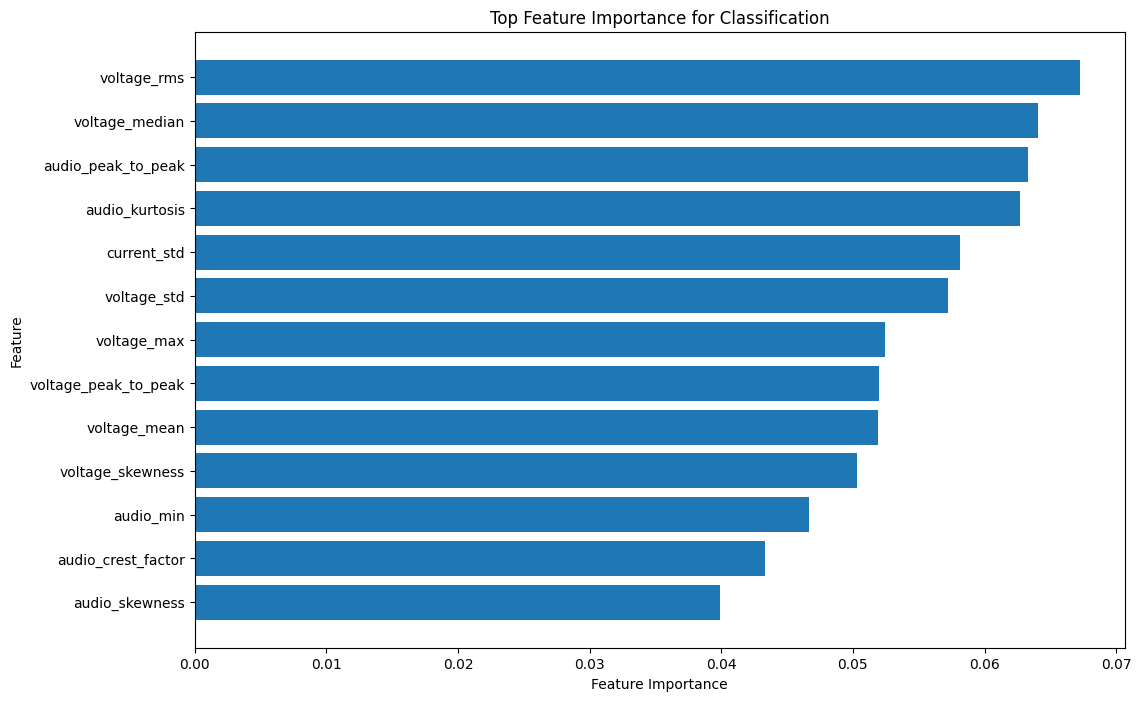

Selected Features: 
['voltage_rms', 'voltage_median', 'audio_peak_to_peak', 'audio_kurtosis', 'current_std', 'voltage_std', 'voltage_max', 'voltage_peak_to_peak', 'voltage_mean', 'voltage_skewness', 'audio_min', 'audio_crest_factor', 'audio_skewness']
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.88      0.88      0.88        16
           2       0.93      0.74      0.82        19
           3       1.00      1.00      1.00         7

    accuracy                           0.87        52
   macro avg       0.88      0.90      0.88        52
weighted avg       0.88      0.87      0.87        52

Cross-Validation Scores: [0.75       1.         0.84615385 0.92307692 0.57692308]
Mean Score: 0.8192307692307692
Standard Deviation: 0.14675987714106858
Accuracy: 0.82 (+/- 0.29)
Class Mapping (Encoded Value to Original Label):
0: iO
1: niO - Tilt
2: niO - offset
3: niO - oil


In [40]:
cleansed_data_filepath = 'src/Data/0001_Database_with_features.xlsx'
evaluator = FeatureImportanceEvaluator(cleansed_data_filepath)
evaluator.load_data()
evaluator.preprocess_data()

evaluator.train_model()
evaluator.evaluate_feature_importance()

no_of_features = 13

# Plots the most important features selected by the RandomForest.
evaluator.plot_feature_importance(no_of_features)

evaluator.train_and_evaluate_top_features_model(top_n=no_of_features)
evaluator.print_class_mapping()

evaluator.cross_validate_model(cv=5)


#### RandomForestClassifier with Cross-Validation

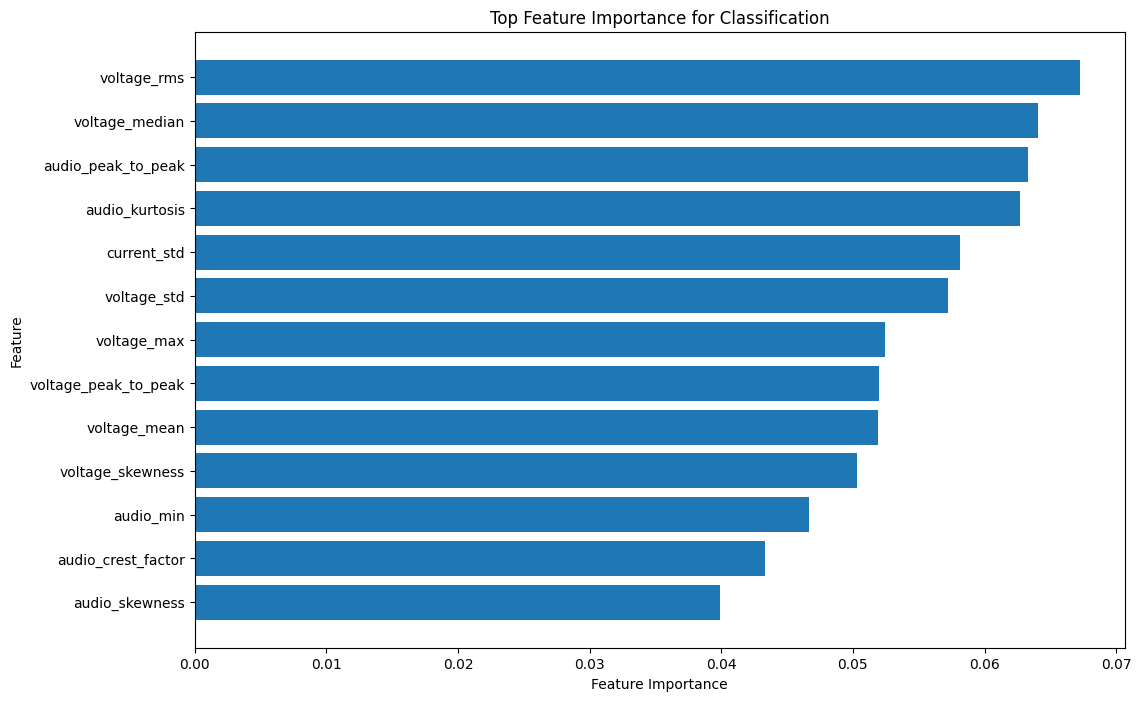

Selected Features: 
['voltage_rms', 'voltage_median', 'audio_peak_to_peak', 'audio_kurtosis', 'current_std', 'voltage_std', 'voltage_max', 'voltage_peak_to_peak', 'voltage_mean', 'voltage_skewness', 'audio_min', 'audio_crest_factor', 'audio_skewness']
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.88      0.88      0.88        16
           2       0.93      0.74      0.82        19
           3       1.00      1.00      1.00         7

    accuracy                           0.87        52
   macro avg       0.88      0.90      0.88        52
weighted avg       0.88      0.87      0.87        52

Cross-Validation Scores: [0.75       1.         0.84615385 0.92307692 0.57692308]
Mean Score: 0.8192307692307692
Standard Deviation: 0.14675987714106858
Accuracy: 0.82 (+/- 0.29)


In [39]:
from src.model_randomstates import FeatureImportanceEvaluator2

cleansed_data_filepath = 'src/Data/0001_Database_with_features.xlsx'
evaluator = FeatureImportanceEvaluator2(cleansed_data_filepath)
evaluator.load_data()
evaluator.preprocess_data()

evaluator.train_model()
evaluator.evaluate_feature_importance()

no_of_features = 13

# Plots the most important features selected by the RandomForest.
evaluator.plot_feature_importance(no_of_features)

evaluator.train_and_evaluate_top_features_model(top_n=no_of_features)
evaluator.cross_validate_model(cv=5)


### (Extra Step) Classifier Comparison

In [21]:
from src.classifier_comparison import ClassifierComparison


cleansed_data_filepath = 'src/Data/0001_Database_with_features.xlsx'
alt_model = ClassifierComparison(cleansed_data_filepath)
alt_model.load_data()
alt_model.preprocess_data()
alt_model.compare_classifiers(top_features=13)


feature_importance_evaluator.print_class_mapping()

['audio_mean', 'audio_std', 'audio_median', 'audio_min', 'audio_max', 'audio_rms', 'audio_peak_to_peak', 'audio_crest_factor', 'audio_skewness', 'audio_kurtosis', 'current_mean', 'current_std', 'current_median', 'current_min', 'current_max', 'current_rms', 'current_peak_to_peak', 'current_crest_factor', 'current_skewness', 'current_kurtosis', 'voltage_mean', 'voltage_std', 'voltage_median', 'voltage_min', 'voltage_max', 'voltage_rms', 'voltage_peak_to_peak', 'voltage_crest_factor', 'voltage_skewness', 'voltage_kurtosis', 'wire_mean', 'wire_std', 'wire_median', 'wire_min', 'wire_max', 'wire_rms', 'wire_peak_to_peak', 'wire_crest_factor', 'wire_skewness']
Selected features after VarianceThreshold: ['audio_mean', 'audio_std', 'audio_median', 'audio_min', 'audio_max', 'audio_rms', 'audio_peak_to_peak', 'audio_crest_factor', 'audio_skewness', 'audio_kurtosis', 'current_mean', 'current_std', 'current_median', 'current_min', 'current_max', 'current_rms', 'current_peak_to_peak', 'current_crest

c:\Users\Oli\anaconda3\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
c:\Users\Oli\anaconda3\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:120: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classifier: Logistic Regression
Validation Accuracy: 0.9231
Validation Classification Report:
{'0': {'precision': 0.8333333333333334, 'recall': 0.8333333333333334, 'f1-score': 0.8333333333333334, 'support': 6.0}, '1': {'precision': 0.9047619047619048, 'recall': 0.95, 'f1-score': 0.926829268292683, 'support': 20.0}, '2': {'precision': 0.9090909090909091, 'recall': 0.8333333333333334, 'f1-score': 0.8695652173913043, 'support': 12.0}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 14.0}, 'accuracy': 0.9230769230769231, 'macro avg': {'precision': 0.9117965367965368, 'recall': 0.9041666666666667, 'f1-score': 0.9074319547543301, 'support': 52.0}, 'weighted avg': {'precision': 0.9231601731601731, 'recall': 0.9230769230769231, 'f1-score': 0.9225263072028713, 'support': 52.0}}

Classifier: K-Nearest Neighbors
Validation Accuracy: 0.9038
Validation Classification Report:
{'0': {'precision': 0.6666666666666666, 'recall': 1.0, 'f1-score': 0.8, 'support': 6.0}, '1': {'precision'